In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [105]:
A = np.array([[1,0,2,1],[4,1,1,0],[0,1,3,0],[5,0,2,1]])
B = np.array([[0,1,0,1],[2,1,1,4],[2,0,1,1],[1,3,5,0]])

In [106]:
def Div(X):
    l = len(X) // 2
    C00 = X[:l,:l]
    C01 = X[:l,l:]
    C10 = X[l:,:l]
    C11 = X[l:,l:]
    return C00,C01,C10,C11

In [135]:
def strassen (n, A, B, C):
    A00,A01,A10,A11 = Div(A)
    B00,B01,B10,B11 = Div(B)
    
    if (n <= 2):
        C = np.dot(A,B)
    else:        
        M1 = M2 = M3 = M4 = M5 = M6 = M7 = np.array([])
        M1 = strassen(n // 2, (A00 + A11), (B00 + B11), M1)
        M2 = strassen(n // 2, (A10 + A11), B00, M2)
        M3 = strassen(n // 2, A00, (B01 - B11), M3)
        M4 = strassen(n // 2, A11, (B10 - B00), M4)
        M5 = strassen(n // 2, (A00 + A01), B11, M5)
        M6 = strassen(n // 2, (A10 - A00), (B00 + B01), M6)
        M7 = strassen(n // 2, (A01 - A11), (B10 + B11), M7)

        C =  np.vstack([np.hstack([M1+M4 -M5 + M7, M3 + M5]), np.hstack([M2 + M4, M1 - M2 + M3 + M6])])
    return C

In [136]:
D = [[0 for cols in range(4)]for rows in range(4)]
strassen(4, A, B, D)

array([[5, 4, 7, 3],
       [4, 5, 2, 9],
       [8, 1, 4, 7],
       [5, 8, 7, 7]])

In [2]:
def get_dis(x,y):
    return math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

In [3]:
def find_closest_pair(arr):
    global rc
    dis = 99999999
    for x in range(len(arr)):
        for y in range(x+1,len(arr)):
            rc += 1
            if dis > get_dis(arr[x],arr[y]):
                dis = get_dis(arr[x],arr[y])
    return dis

In [4]:
def ClosestPair(arr):
    global rc
    if (len(arr) <= 3):
        return
    else:
        
        # 2분할
        m = len(arr) // 2
        arr_left = arr[:m,:]
        arr_right = arr[m:,:]
        
        # Pl,Pr 각각의 closest pair 중에 더 작은 값 구하기
        d = min(find_closest_pair(arr_left), find_closest_pair(arr_right))
        # 중간 범위에 포함되는 점들 담기
        temp = []

        for i in range(1,len(arr_left)):
            rc += 1
            if arr_left[-1][0] - arr_left[-i][0] < d:
                temp.append(arr_left[-i])
            else:
                break
                
        for j in range(1,len(arr_right)):
            rc += 1
            if arr_right[j][0] - arr_right[0][0] < d:
                temp.append(arr_right[j])
            else:
                break

        # 중간 범위 점들간의 거리중 d보다 작은 것으로 갱신
        for x in range(len(temp)):
            for y in range(x+1,len(temp)):
                rc += 1
                if get_dis(temp[x],temp[y]) < d:
                    d = get_dis(temp[x],temp[y])

        return d

In [8]:
# uniform distribution을 따르는 2차원 평면상의 좌표 생성
n = 900
rc = 0
uniform = np.random.uniform(low=0, high=1, size=(n,2))
uniform = uniform[uniform[:, 0].argsort()]
ClosestPair(uniform)
runtime.append(rc)

In [9]:
ClosestPair(uniform)

0.0005827549025078256

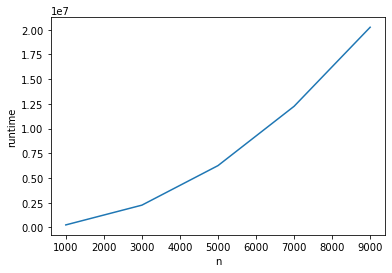

In [386]:
plt.plot([1000,3000,5000,7000,9000],runtime)
plt.ylabel('runtime')
plt.xlabel('n')
plt.show()